# Decision Tree

In [17]:
!pip install graphviz

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt

In [3]:
cancer = load_breast_cancer()

In [5]:
print(cancer.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [23]:
cancer.feature_names ,cancer.data

(array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal dimension'],
       dtype='<U23'),
 array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
           2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
        [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
           1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
        [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...

In [8]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [11]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [13]:
print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 1.000000
accuracy on test set: 0.937063


One possible way is to stop building the tree after a certain depth has been reached. we set max_depth=4, meaning only four consecutive questions can be asked.

In [14]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)

print("accuracy on training set: %f" % tree.score(X_train, y_train))
print("accuracy on test set: %f" % tree.score(X_test, y_test))

accuracy on training set: 0.988263
accuracy on test set: 0.951049


## Analyzing Decision Tree

In [19]:
export_graphviz(tree, out_file="mytree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

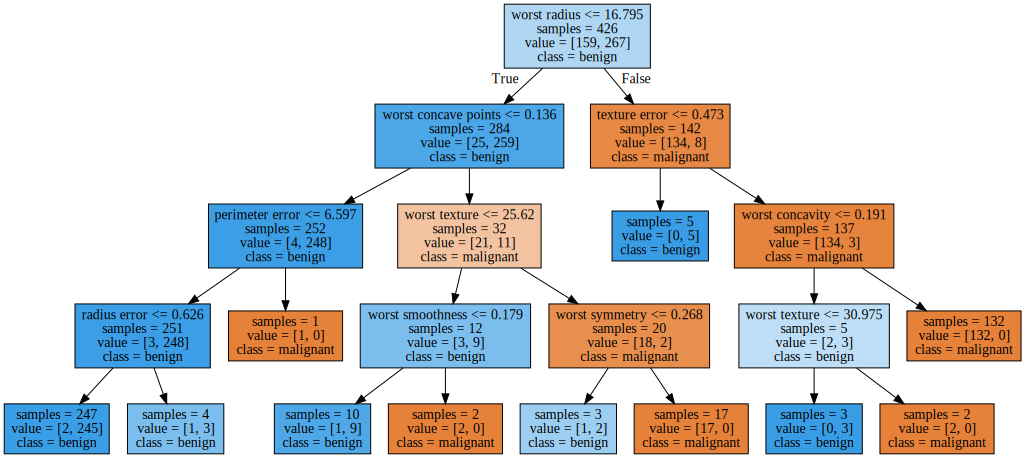

In [21]:
with open("mytree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

## Feature Importance in trees

In [24]:
tree.feature_importances_

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.0024156 ,  0.04839825,  0.01019737,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.72682851,  0.0458159 ,  0.        ,  0.        ,  0.0141577 ,
        0.        ,  0.018188  ,  0.1221132 ,  0.01188548,  0.        ])

(0, 1)

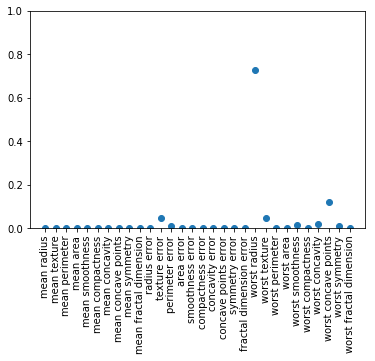

In [28]:
plt.plot(tree.feature_importances_, 'o')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)

plt.ylim(0, 1)

In [30]:
cancer.data.shape[1]

30